<a href="https://colab.research.google.com/github/alberzenon/AprendizajeAutomatico/blob/main/ACtividad8_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Maximizar una función

Hoy voy a explicar dos enfoques de algoritmos genéticos para maximizar una función no lineal. Este problema fue el primero que resolví con algoritmos genéticos y fue toda una experiencia


In [49]:
#importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math



In [50]:
# Debemos encontrar el valor de X que maximice el valor de y en la siguiente función.


def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2



In [51]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

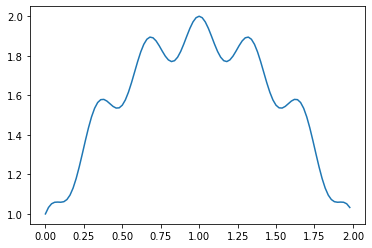

In [52]:


plt.plot(x_axis,y_axis)



Como se puede observar arriba, la función tiene varios máximos y mínimos locales. El objetivo es llegar al punto más alto que se encuentra en

.

Aquí realicé dos enfoques, uno donde los genes se representan mediante números decimales y otro donde se representan mediante código binario. Esto produce resultados interesantes, pero lo importante es entender los componentes principales del algoritmo genético. Así que avanzaré primero con el enfoque más obvio y luego pasaré al código binario.
Algoritmos genéticos
Representación de los genes

Primero, tenemos que planificar qué representan los genes de nuestros individuos. Los genes deben tener la capacidad de resolver el problema, aunque no lo hagan de forma inmediata; y su efectividad debe poder medirse con precisión.


In [53]:
#individuo de ejemplo 
x = 0.54
y = fx(x)

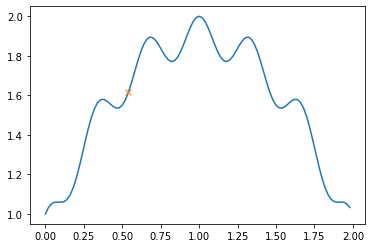

In [54]:
plt.plot(x_axis,y_axis)
plt.plot(x,y,'x')

In [55]:
#El individuo de ejemplo se encuentra representado por una x en el gráfico superior.
# Así que nuestra población debe estar compuesta por números que van desde hasta .
# Sabiendo esto, nuestros genes pueden representar valores decimales de ese número.



#individuo de ejemplo 
#x = 0.54
x = [0,5,4]




In [56]:
# Necesitamos representar los genes como una lista para poder realizar la mutación y el entrecruzamiento. 
#Así que debemos manejar una función que convierta una lista en números decimales.


def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal



In [57]:
listToDecimal(x)

0.54

In [69]:
#Para hacer esto más interesante me gustaría manejar individuos con un código genético más grande, 
#así que voy a definir un ind_size con el cual generaré un primer código genético aleatorio


ind_size =250
#Genetic pool
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]

individuo = []
individuo += [np.random.choice(genetic_pool[0])]
individuo += list(np.random.choice(genetic_pool[1],ind_size-1))

individuo





[1,
 9,
 2,
 1,
 0,
 2,
 0,
 4,
 4,
 5,
 7,
 3,
 4,
 7,
 1,
 8,
 3,
 1,
 8,
 3,
 8,
 5,
 2,
 9,
 2,
 3,
 4,
 8,
 3,
 4,
 8,
 6,
 9,
 7,
 8,
 0,
 3,
 6,
 2,
 8,
 6,
 6,
 3,
 4,
 5,
 7,
 3,
 8,
 9,
 1,
 8,
 3,
 7,
 9,
 5,
 5,
 6,
 1,
 8,
 0,
 5,
 0,
 3,
 1,
 6,
 8,
 4,
 7,
 2,
 1,
 1,
 5,
 9,
 0,
 1,
 5,
 8,
 8,
 6,
 8,
 1,
 5,
 1,
 8,
 6,
 7,
 7,
 8,
 8,
 5,
 4,
 8,
 6,
 9,
 3,
 7,
 0,
 7,
 7,
 4,
 6,
 9,
 1,
 3,
 9,
 5,
 4,
 9,
 6,
 3,
 4,
 2,
 6,
 2,
 6,
 3,
 8,
 1,
 2,
 2,
 2,
 1,
 3,
 4,
 0,
 0,
 5,
 2,
 5,
 6,
 9,
 0,
 9,
 5,
 6,
 4,
 7,
 6,
 0,
 6,
 1,
 6,
 3,
 8,
 7,
 9,
 7,
 8,
 3,
 3,
 2,
 3,
 0,
 1,
 3,
 2,
 8,
 6,
 9,
 0,
 0,
 9,
 2,
 1,
 7,
 0,
 2,
 4,
 0,
 5,
 9,
 8,
 0,
 5,
 3,
 2,
 5,
 3,
 1,
 4,
 0,
 4,
 7,
 9,
 7,
 8,
 3,
 1,
 1,
 8,
 4,
 8,
 0,
 3,
 1,
 6,
 0,
 6,
 6,
 0,
 8,
 1,
 5,
 9,
 7,
 2,
 1,
 9,
 4,
 3,
 7,
 0,
 7,
 6,
 5,
 3,
 7,
 5,
 0,
 0,
 3,
 4,
 6,
 1,
 6,
 8,
 3,
 4,
 4,
 1,
 9,
 6,
 9,
 9,
 1,
 5,
 1,
 6,
 9,
 9,
 5,
 8,
 0,
 1,
 2,
 4,
 6,
 7,
 7,
 5]

In [70]:


listToDecimal(individuo)



1.921020445734718

In [60]:
#Al convertir la lista en decimal podemos notar una pequeña variación al final debido a la forma en que python realiza la suma de punto flotante, pero nada de mucho peso.


poblacion = []

for i in range(100):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
    poblacion.append(individuo)
poblacion[:10]



[[1, 5, 1, 2, 3, 8, 1, 1, 7, 9, 6, 1, 2, 2, 3],
 [0, 3, 4, 1, 8, 2, 9, 9, 3, 4, 6, 3, 9, 5, 2],
 [1, 9, 3, 6, 7, 2, 5, 8, 2, 1, 2, 1, 4, 4, 8],
 [0, 5, 8, 2, 0, 2, 1, 3, 0, 1, 0, 2, 2, 6, 9],
 [1, 1, 6, 2, 7, 6, 5, 7, 1, 9, 7, 0, 8, 0, 3],
 [0, 1, 7, 6, 5, 9, 4, 9, 9, 5, 2, 1, 0, 1, 8],
 [1, 1, 6, 6, 3, 4, 9, 4, 2, 1, 0, 8, 5, 2, 5],
 [0, 5, 1, 7, 3, 2, 2, 5, 3, 2, 3, 3, 3, 2, 5],
 [0, 5, 7, 0, 9, 2, 8, 2, 0, 8, 7, 1, 7, 9, 7],
 [0, 6, 0, 4, 0, 8, 8, 8, 0, 5, 2, 9, 6, 5, 9]]

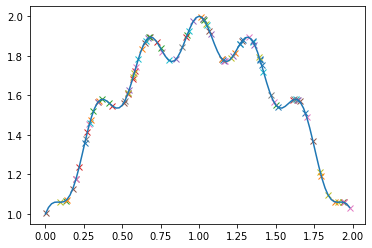

In [61]:
#Finalmente, genero una población llena de individuos con genes aleatorios. De esta población vamos a elegir los mejores para reproducirlos.
#Abajo observarás cómo se encuentra repartida la población.


for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)




Medición del éxito

Esto se suele llamar fitness. Aquí vamos a medir el éxito del individuo para cumplir con el objetivo y determinar la probabilidad que tendrá de reproducirse.
Ya que queremos maximizar una función, aquellos individuos que produzcan un valor más alto en
serán seleccionados como los mejores.

In [62]:



fitness =[]

#extraigo los valores de y para medir su éxito
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    fitness += [y]
    
#convierto fitnees en un vector para realizar operaciones
#más fácilmente
fitness = np.array(fitness)

#divido todos los valores de y para la suma total
#y así obtener valores entre 0 y 1
fitness=fitness/fitness.sum()


    





In [63]:
fitness

array([0.0095137 , 0.00967032, 0.00654431, 0.0106419 , 0.01095666,
       0.00694143, 0.01094772, 0.00971217, 0.01045601, 0.01100366,
       0.01098444, 0.01234099, 0.00956532, 0.0099218 , 0.01179687,
       0.01170416, 0.00897596, 0.00851181, 0.00750185, 0.01097903,
       0.01102378, 0.00735113, 0.00938667, 0.00973768, 0.011116  ,
       0.01153186, 0.01125067, 0.01101568, 0.01103617, 0.01207349,
       0.0083856 , 0.00655543, 0.01176791, 0.01038976, 0.01004889,
       0.00620021, 0.00637243, 0.00975208, 0.00677964, 0.0115592 ,
       0.00934523, 0.01133346, 0.00963294, 0.01153807, 0.01167633,
       0.01156621, 0.01075289, 0.00995417, 0.01108835, 0.01159553,
       0.01157993, 0.00969649, 0.01134732, 0.00653395, 0.011471  ,
       0.0072747 , 0.01169659, 0.00990226, 0.01210172, 0.01148317,
       0.01161932, 0.01120431, 0.00659206, 0.0087236 , 0.00968306,
       0.00964852, 0.00921966, 0.01226383, 0.00654293, 0.00976089,
       0.01082037, 0.0066218 , 0.00975698, 0.00763895, 0.01102

In [64]:
array = np.array([8,5])
array = array/array.sum()
array

array([0.61538462, 0.38461538])

In [65]:


array = np.array([8,2])
array = array/array.sum()
array



array([0.8, 0.2])

Los números más grandes producen un porcentaje mayor, y ya que la probabilidad se mide entre 0 y 1, esto ya nos permite darle una probabilidad mayor de reproducirse a los mejores individuos, aquellos que obtuvieron números más grandes en

.
Entrecruzamiento

El entrecruzamiento consiste en mezclar los genes de los mejores individuos. En este caso vamos a elegir dos padres al azar, de acuerdo a la probabilidad del fitness, para que produzcan un nuevo individuo.
Es importante no descartar de lleno a los peores individuos ya que, tal vez, su código genético puede servir para lograr algo mejor más tarde.
Luego, se elige un cross_point a partir del cual se van a combinar los genes de los padres. Se va a copiar los genes del primer padre hasta este punto, y luego los genes del otro padre.


In [66]:
size_poblacion = len(poblacion)
#hijos
offspring = []
for i in range(size_poblacion//2):
    parents = np.random.choice(size_poblacion, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
    offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]



In [71]:
offspring[:10]

[[1, 9, 4, 6, 0, 5, 2, 6, 0, 3, 3, 2, 5, 4, 2],
 [1, 2, 6, 5, 3, 4, 9, 7, 3, 8, 4, 9, 1, 8, 2],
 [1, 6, 2, 9, 0, 1, 7, 7, 7, 2, 7, 5, 0, 2, 0],
 [1, 0, 2, 8, 2, 1, 1, 3, 2, 9, 7, 6, 0, 4, 7],
 [0, 2, 5, 5, 9, 4, 0, 1, 5, 1, 4, 9, 9, 9, 1],
 [0, 5, 3, 8, 1, 6, 3, 5, 0, 3, 7, 9, 0, 5, 6],
 [1, 7, 9, 6, 0, 2, 2, 4, 2, 3, 2, 2, 5, 0, 5],
 [1, 2, 8, 6, 0, 9, 2, 0, 7, 8, 0, 2, 3, 7, 9],
 [1, 0, 7, 5, 1, 0, 8, 6, 7, 8, 0, 2, 5, 0, 5],
 [1, 2, 8, 6, 0, 9, 2, 0, 6, 1, 1, 0, 8, 3, 4]]

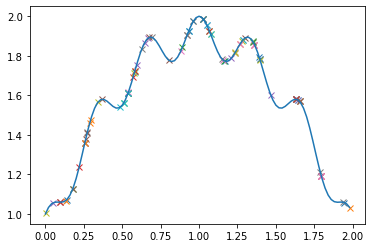

In [72]:


poblacion = offspring
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

